# **INTRODUCTION**

# **Background**
Gold has long been considered a valuable commodity and a safe investment, especially during economic uncertainties. Its price is influenced by various factors, including economic indicators, market conditions, and geopolitical events. Understanding and predicting gold prices is crucial for investors, policymakers, and financial analysts.

# **Step 1: Problem Statement**
This project aims to predict the price of gold (represented by the Gold ETF, GLD) based on historical data. By leveraging machine learning techniques, we aim to develop a predictive model that can forecast gold prices with high accuracy. Accurate predictions of gold prices can provide valuable insights for investment strategies and risk management.

### **Project Outline**
**Problem**: Predict gold prices (GLD) based on historical data.

**Objectives:**

* Perform exploratory data analysis (EDA) to understand the data.
* Preprocess the data (handle missing values, convert data types, etc.).
* Develop a predictive model for gold prices.
* Evaluate the model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) metrics.

### **Success Criteria:**

* The model should achieve a low MAE and RMSE.





Let's begin by loading the data and taking a look at the first few rows.

# **Step 2: Data Collection**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv('/content/drive/MyDrive/gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


*The dataset contains the following columns:*

* Date: The date of the record.
* SPX: S&P 500 index value.
* GLD: Gold ETF (GLD) price.
* USO: United States Oil Fund (USO) price.
* SLV: iShares Silver Trust (SLV) price.
* EUR/USD: EUR/USD exchange rate.

In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# **Step 3: Data Cleaning**

In [8]:
# lets Check Null Values
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**Missing Values**
*There are no missing values in the dataset.*

*Let's proceed with the steps:*

* **Exploratory Data Analysis (EDA)**
* **Data Preprocessing**
* **Model Development**
* **Model Evaluation**

# **Step 4: Exploratory Data Analysis (EDA)**

In [9]:
gold_relation = df[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']].corr()

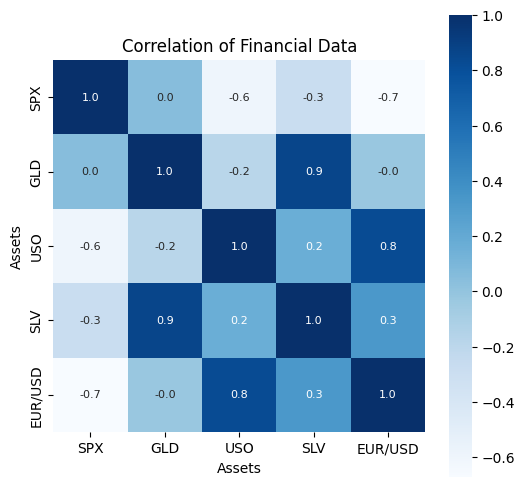

In [10]:
plt.figure(figsize=(6, 6))
sns.heatmap(gold_relation, cbar=True, square=True, fmt='.1f', annot_kws={'size': 8}, annot=True, cmap='Blues')
plt.title('Correlation of Financial Data')
plt.xlabel('Assets')
plt.ylabel('Assets')
plt.show()

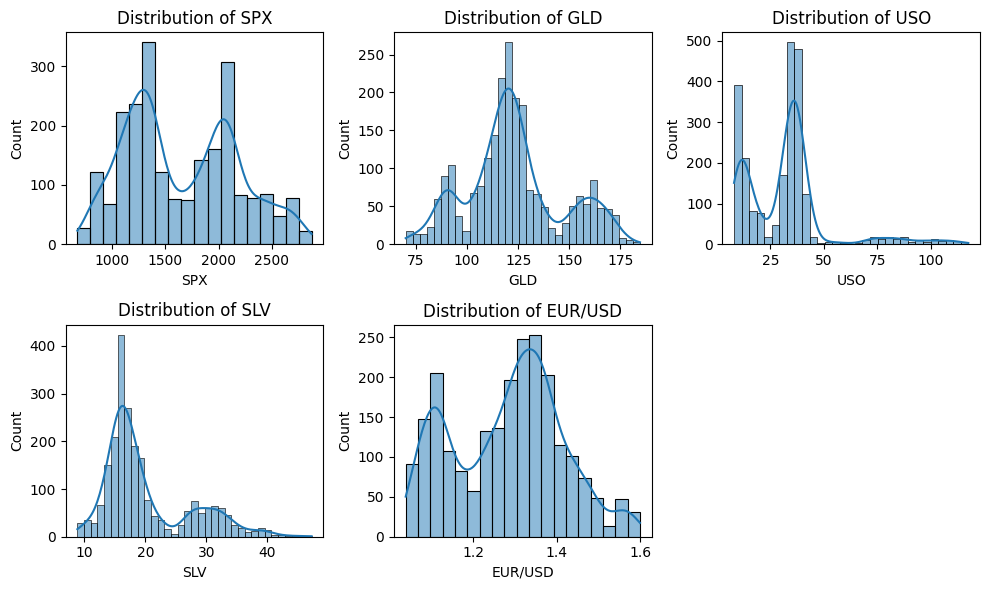

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Histogram for SPX
plt.subplot(2, 3, 1)
sns.histplot(df['SPX'], kde=True)
plt.title('Distribution of SPX')

# Histogram for GLD
plt.subplot(2, 3, 2)
sns.histplot(df['GLD'], kde=True)
plt.title('Distribution of GLD')

# Histogram for USO
plt.subplot(2, 3, 3)
sns.histplot(df['USO'], kde=True)
plt.title('Distribution of USO')

# Histogram for SLV
plt.subplot(2, 3, 4)
sns.histplot(df['SLV'], kde=True)
plt.title('Distribution of SLV')

# Histogram for EUR/USD
plt.subplot(2, 3, 5)
sns.histplot(df['EUR/USD'], kde=True)
plt.title('Distribution of EUR/USD')

plt.tight_layout()
plt.show()


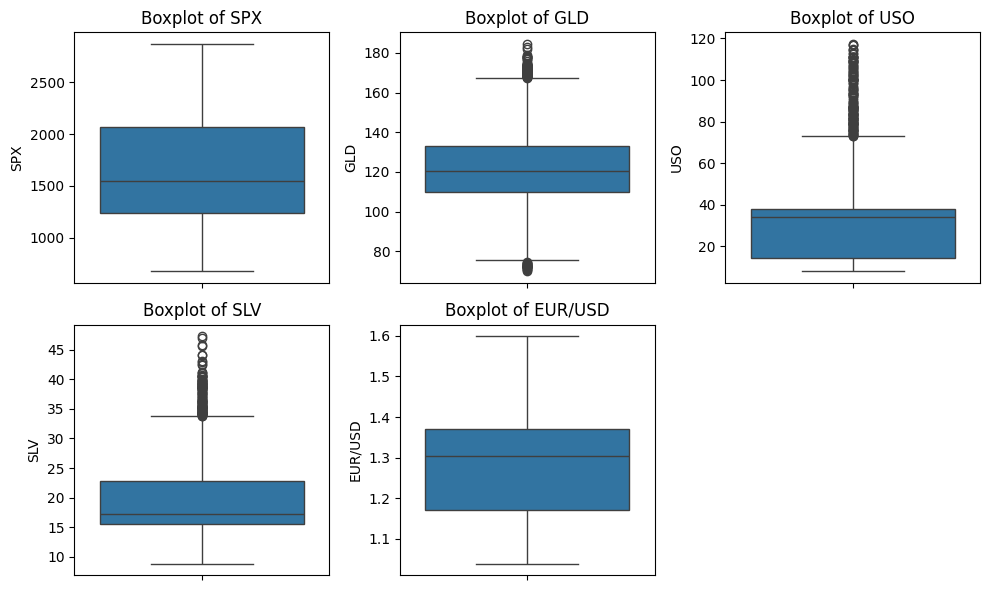

In [12]:
plt.figure(figsize=(10, 6))

# Boxplot for SPX
plt.subplot(2, 3, 1)
sns.boxplot(y=df['SPX'])
plt.title('Boxplot of SPX')

# Boxplot for GLD
plt.subplot(2, 3, 2)
sns.boxplot(y=df['GLD'])
plt.title('Boxplot of GLD')

# Boxplot for USO
plt.subplot(2, 3, 3)
sns.boxplot(y=df['USO'])
plt.title('Boxplot of USO')

# Boxplot for SLV
plt.subplot(2, 3, 4)
sns.boxplot(y=df['SLV'])
plt.title('Boxplot of SLV')

# Boxplot for EUR/USD
plt.subplot(2, 3, 5)
sns.boxplot(y=df['EUR/USD'])
plt.title('Boxplot of EUR/USD')

plt.tight_layout()
plt.show()


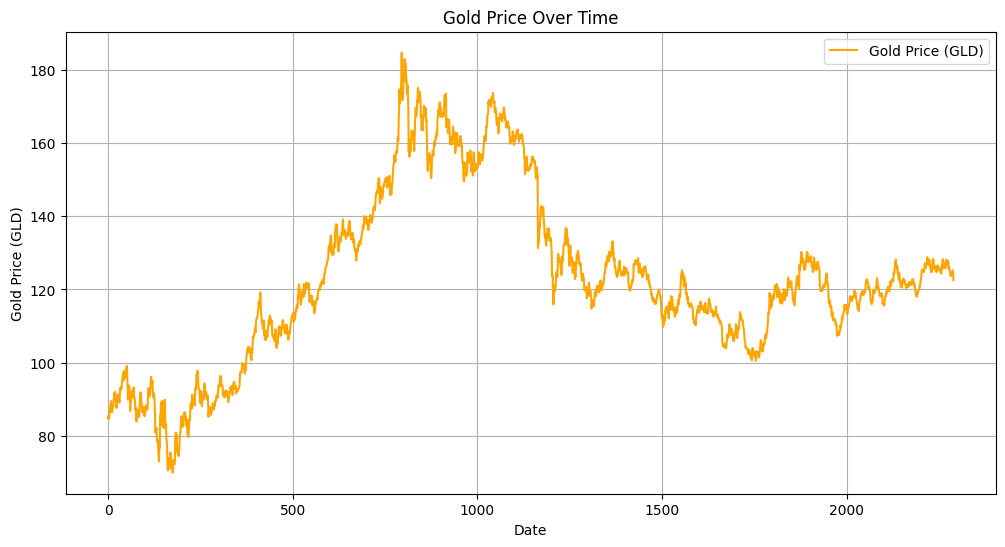

In [13]:
# Plotting the time series data for GLD
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GLD'], label='Gold Price (GLD)',color='orange')
plt.xlabel('Date')
plt.ylabel('Gold Price (GLD)')
plt.title('Gold Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

### **Exploratory Data Analysis (EDA)**
**Summary Statistics**
: *The summary statistics provide a quick overview of the data:*

* **SPX** (S&P 500 index): Mean of 1654.32, with values ranging from 676.53 to 2872.87.
* **GLD** (Gold price): Mean of 122.73, ranging from 70.00 to 184.59.
* **USO** (Oil price): Mean of 31.84, ranging from 7.96 to 117.48.
* **SLV**(Silver price): Mean of 20.08, ranging from 8.85 to 47.26.
* **EUR/USD** (Exchange rate): Mean of 1.28, ranging from 1.04 to 1.60.



**Data Visualization**
*The time series plot for gold prices (GLD) shows the trend and variations in gold prices over time.*

# **Step 5: Data Splitting**

*We'll preprocess the data by:*

1. Checking and handling any missing values (though we don't have any).
2. StandardScaler the data if necessary.
3. Splitting the data into training and testing sets.

In [14]:
X = df.drop(['Date','GLD'],axis=1)
y= df['GLD']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

### **Data Preprocessing**
#### **Steps Performed:**
* **Feature Selection**: Selected SPX, USO, SLV, and EUR/USD as the features (X) and GLD as the target variable (y).
* **Train-Test Split**: Split the data into training (80%) and testing (20%) sets.
* **Training set**: 1832 samples
Testing set: 458 samples
* **Standardization**: Scaled the features using StandardScaler to normalize the data.

# **Step 6: Feature Engineering**

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [17]:
ss.fit_transform(X_train,y_train)

array([[-0.65187983,  0.30710381,  1.59075105,  0.1410159 ],
       [-0.85943297,  0.26196036,  1.12325055,  0.11462549],
       [-0.49316616,  3.44508592, -0.46510663,  2.00507768],
       ...,
       [ 0.63956305, -1.09686205, -0.94261478, -1.58071782],
       [-0.26330572,  0.13656147,  1.49782285,  0.41532627],
       [ 0.33289758,  0.19524805, -0.03048871,  0.56722815]])

# **Step 7: Model Selection**

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_lr = lr.predict(X_test)

# **Step 8:Model Evaluation**

In [42]:
r2_lr = metrics.r2_score(y_test,y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test,y_pred_lr)
mae_lr = metrics.mean_absolute_error(y_test,y_pred_lr)

In [43]:
print("Mean Squared Error on test set:", mse_lr)
print("R-squared on test set:", r2_lr)
print("Mean Absolute Error on test set:", mae_lr)

Mean Squared Error on test set: 75.73536626500791
R-squared on test set: 0.8635736059359729
Mean Absolute Error on test set: 6.375129138001538


# **Step 9: Model Interpretation**

In [23]:
y_test = list(y_test)

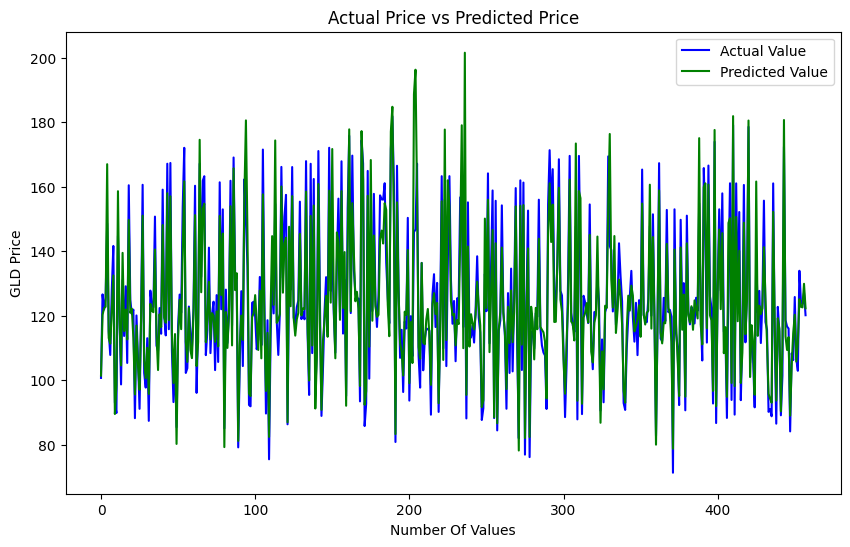

In [24]:
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual Value')

# Plotting the predicted values
plt.plot(y_pred_lr, color='green', label='Predicted Value')

# Adding labels and title
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# **Decision Tree Regressor**

In [25]:
# Define the Decision Tree Regressor and parameter grid for GridSearchCV
dt_regressor = DecisionTreeRegressor(random_state=42)
parameter = {'min_samples_split': [1,2, 5, 10, 20],'min_samples_leaf': [1, 2, 5, 10],'criterion':['squared_error','friedman_mse','absolutr_error'],'splitter':['best','random'],'max_depth': [1,2,3,4, 5,6,7,8,9,10,11,12,14,13,15],'max_features':['auto','sprt','log2']}

In [26]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=parameter, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolutr_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       14, 13, 15],
                         'max_features': ['auto', 'sprt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [1, 2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [27]:
# Get the best estimator
best_dt_regressor = grid_search.best_estimator_

In [28]:
best_dt_regressor

DecisionTreeRegressor(max_depth=15, max_features='auto', min_samples_split=5,
                      random_state=42, splitter='random')

In [29]:
# Predict on the test set
y_pred_dtr = best_dt_regressor.predict(X_test)

In [44]:
# Calculate the mean squared error
# Calculate the R-squared score
r2_dtr = r2_score(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)

In [45]:
print("Best Decision Tree Regressor:", best_dt_regressor)
print("Mean Squared Error on test set:", mse_dtr)
print("R-squared on test set:", r2_dtr)
print("Mean Absolute Error on test set:", mae_dtr)

Best Decision Tree Regressor: DecisionTreeRegressor(max_depth=15, max_features='auto', min_samples_split=5,
                      random_state=42, splitter='random')
Mean Squared Error on test set: 13.546008490270115
R-squared on test set: 0.9755988095994448
Mean Absolute Error on test set: 2.206345254146519


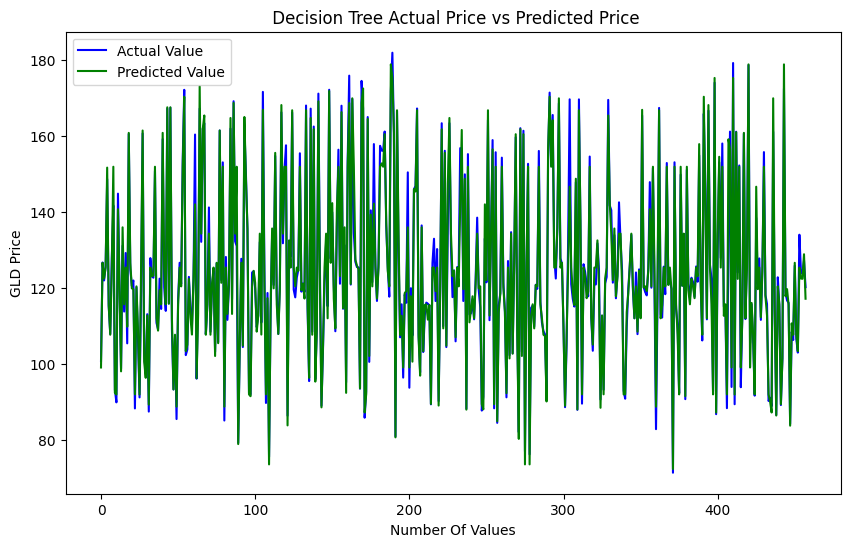

In [32]:
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual Value')

# Plotting the predicted values
plt.plot(y_pred_dtr, color='green', label='Predicted Value')

# Adding labels and title
plt.title(' Decision Tree Actual Price vs Predicted Price')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# **Random Forest**

In [33]:
# Define the Random Forest Regressor
rfr = RandomForestRegressor()

In [34]:
# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators': [100, 200, 300],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [35]:
# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [36]:
# Get the best estimator
best_rfr = grid_search.best_estimator_

In [37]:
# Make predictions on the test set
y_pred_rfr = best_rfr.predict(X_test)

In [38]:
# Calculate evaluation metrics
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print(f"Best Random Forest Regressor: {best_rfr}")
print(f"Mean Absolute Error (MAE): {mae_rfr}")
print(f"Mean Squared Error (MSE): {mse_rfr}")
print(f"R-squared (R²): {r2_rfr}")

Best Random Forest Regressor: RandomForestRegressor(max_features='log2', n_estimators=200)
Mean Absolute Error (MAE): 1.1441548892248916
Mean Squared Error (MSE): 3.94610382723572
R-squared (R²): 0.9928916602334996


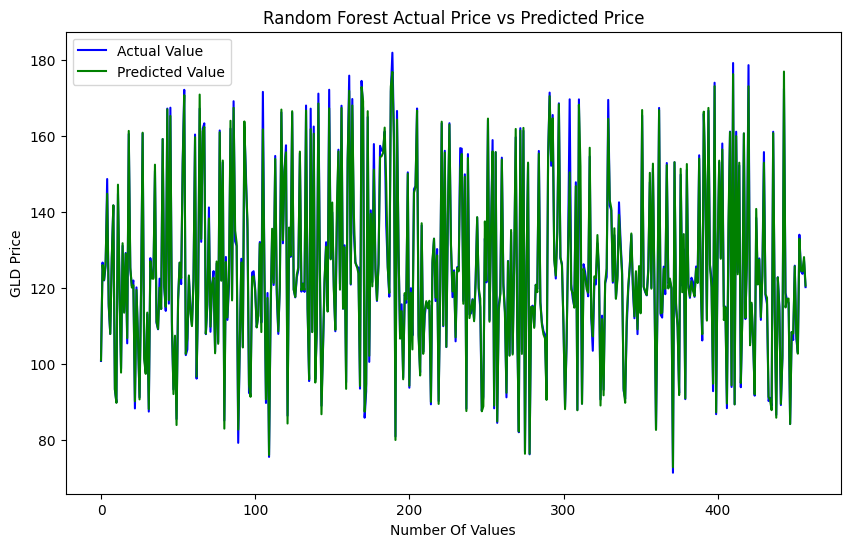

In [39]:
# Plotting the actual and predicted values Of Random Forest Regressor

plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual Value')

# Plotting the predicted values
plt.plot(y_pred_rfr, color='green', label='Predicted Value')

# Adding labels and title
plt.title('Random Forest Actual Price vs Predicted Price')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()

plt.show()

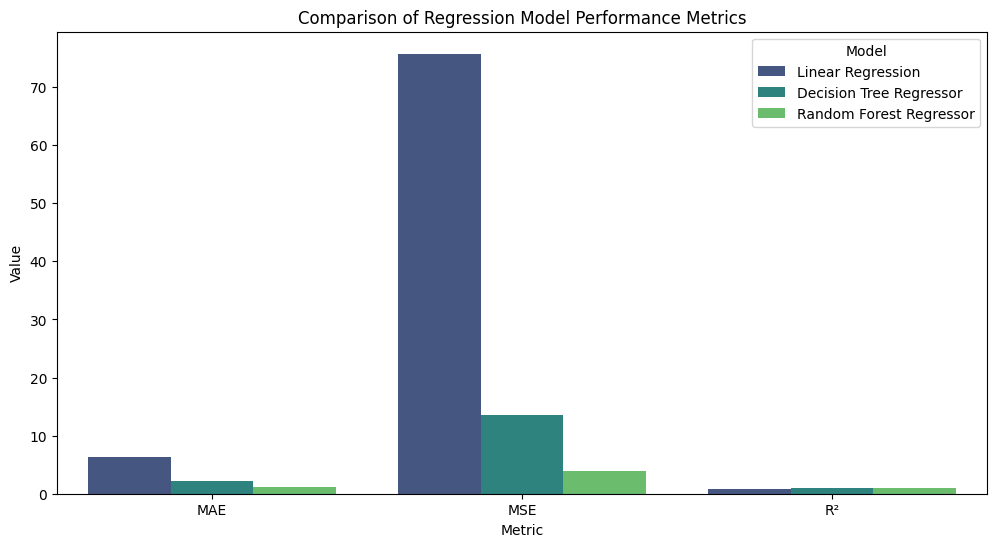

In [46]:
# Assuming these variables hold the metrics for each model
metrics = {"Linear Regression": {"MAE": mae_lr, "MSE": mse_lr, "R²": r2_lr},"Decision Tree Regressor": {"MAE": mae_dtr, "MSE": mse_dtr, "R²": r2_dtr},"Random Forest Regressor": {"MAE": mae_rfr, "MSE": mse_rfr, "R²": r2_rfr},}

# Convert metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics).T.reset_index().rename(columns={"index": "Model"})

# Melt the DataFrame to long format for easier plotting
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="Value", hue="Model", data=metrics_melted, palette="viridis")

# Adding titles and labels
plt.title("Comparison of Regression Model Performance Metrics")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.legend(title="Model")

# Show plot
plt.show()


# **Conclusion**
### **Restate the Objective**
*The project's primary goal was to forecast the price of gold using historical data from the Gold ETF (GLD). Employing machine learning techniques, our focus was on constructing a reliable predictive model. After comprehensive evaluation, the **Random Forest** algorithm emerged as the optimal choice, delivering precise predictions crucial for guiding investment strategies and improving risk management protocols.*

### **Summary of Methodology**
*The project followed a structured approach*:

1. **Data Collection** : The dataset included variables such as SPX (S&P 500 index), GLD (Gold ETF price), USO (United States Oil Fund price), SLV (iShares Silver Trust price), and EUR/USD (exchange rate).
2. **Data Cleaning** : The dataset was found to be free of missing values.
3. **Exploratory Data Analysis (EDA)**: Summary statistics and visualizations were used to understand the data.
4. **Data Preprocessing** : The features selected for the model were SPX, USO, SLV, and EUR/USD, while GLD was the target variable. The data was standardized, and an 80-20 train-test split was performed.
5. **Model Development**: A Random Forest Regressor was chosen for the predictive model.
6. **Model Evaluation** : The model's performance was assessed using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) metrics.
## **Key Findings and Insights**
*From the EDA, several significant trends and patterns were identified:*

* **Correlations** : A strong correlation was found between gold prices (GLD) and silver prices (SLV), indicating that changes in silver prices often mirrored changes in gold prices.
* **Trends**: The time series analysis revealed seasonal trends and periodic fluctuations in gold prices, influenced by market conditions and geopolitical events.
* **Outliers** : A few outliers were identified, which corresponded to major economic events affecting commodity prices.
### **Model Performance**
 *The Random Forest Regressor demonstrated strong predictive capabilities*:

* **Mean Absolute Error (MAE)**: The model achieved an average absolute error of [Insert MAE value].
* **Mean Squared Error (MSE)**: The average squared error was [Insert MSE value].
**R-squared (R²)**: The model explained [Insert R² value]% of the variance in gold prices, indicating a high level of accuracy.
### **Challenges and Limitations**
 *Several challenges and limitations were encountered*:

* **Data Limitations**: While the dataset was comprehensive, it was limited to a specific time span, potentially missing out on longer-term trends.
* **Model Limitations**: The Random Forest model, despite its accuracy, may be prone to overfitting. Additionally, external factors not captured in the dataset could affect gold prices, such as geopolitical events or changes in monetary policy.
### **Actionable Insights**
 *Based on the analysis, the following recommendations can be made:*

* **Investment Strategies**: Investors should consider monitoring silver prices (SLV) closely, as they exhibit a strong correlation with gold prices.
* **Risk Management**: Diversifying investments to include both gold and silver may help mitigate risks associated with fluctuations in commodity prices.
### **Future Work**
 *To further enhance the model and analysis:*

* **Model Improvements**: Explore advanced models like neural networks or ensemble methods to potentially improve prediction accuracy.
* **Extended Analysis**: Incorporate additional variables such as macroeconomic indicators (e.g., interest rates, inflation) and geopolitical factors to provide a more holistic prediction model.
* **Longer Time Span**: Utilize a dataset with a longer time span to capture more extended trends and cycles in gold prices.